In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d ashenafifasilkebede/dataset

100% 2.93G/2.93G [00:41<00:00, 98.8MB/s]
100% 2.93G/2.93G [00:41<00:00, 75.0MB/s]


In [3]:
! unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Normal/Normal_100x_85.jpg  
  inflating: train/Normal/Normal_100x_86.jpg  
  inflating: train/Normal/Normal_100x_87.jpg  
  inflating: train/Normal/Normal_100x_89.jpg  
  inflating: train/Normal/Normal_100x_9.jpg  
  inflating: train/Normal/Normal_400x_1.jpg  
  inflating: train/Normal/Normal_400x_100.jpg  
  inflating: train/Normal/Normal_400x_101.jpg  
  inflating: train/Normal/Normal_400x_102.jpg  
  inflating: train/Normal/Normal_400x_103.jpg  
  inflating: train/Normal/Normal_400x_107.jpg  
  inflating: train/Normal/Normal_400x_108.jpg  
  inflating: train/Normal/Normal_400x_109.jpg  
  inflating: train/Normal/Normal_400x_11.jpg  
  inflating: train/Normal/Normal_400x_110.jpg  
  inflating: train/Normal/Normal_400x_111.jpg  
  inflating: train/Normal/Normal_400x_112.jpg  
  inflating: train/Normal/Normal_400x_113.jpg  
  inflating: train/Normal/Normal_400x_114.jpg  
  inflating: train/Normal/Normal_400x_115.jpg 

In [5]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2

(224, 224, 3)


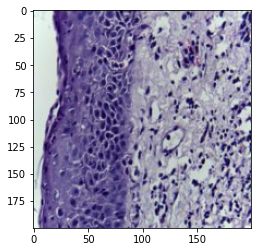

In [25]:
img_path='/content/train'
directories=['Normal','OSCC']
for dir in directories:
  path=os.path.join(img_path,dir)
  class_label=directories.index(dir)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    print(img_array.shape)
    colored=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    new_array=cv2.resize(colored,(200,200))
    plt.imshow(new_array)
    break
  break

In [75]:
training_data=[]
img_names={'image':[],
            'label':[]}
img_path='/content/train'
directories=['Normal','OSCC']
def create_training():
  for dir in directories:
    path=os.path.join(img_path,dir)
    class_label=directories.index(dir)
    for img in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,img))
      colored=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
      new_array=cv2.resize(colored,(200,200))
      training_data.append([new_array,class_label])
      img_names['image'].append(img)
      img_names['label'].append(class_label)
create_training()




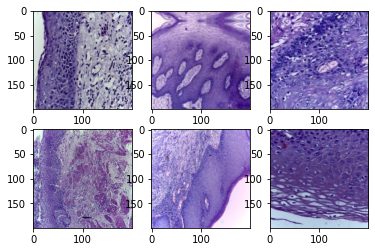

In [80]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(training_data[i][0])
plt.show()

In [47]:
df1=pd.DataFrame(img_names)

df1['label'].value_counts()

1    2511
0    2435
Name: label, dtype: int64

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torch.optim as optim
import torchvision.transforms as transforms

In [81]:
df1.head(
    
)

,image,label
0,aug_99_9672.jpg,0
1,aug_597_7609.jpg,0
2,aug_409_9835.jpg,0
3,Normal_100x_65.jpg,0
4,aug_57_2664.jpg,0


In [82]:
df1.tail()

,image,label
4941,aug_97_9542.jpg,1
4942,OSCC_100x_329.jpg,1
4943,aug_263_5905.jpg,1
4944,aug_319_2319.jpg,1
4945,OSCC_400x_387.jpg,1
